<a href="https://colab.research.google.com/github/sooonsyk/ESAA/blob/main/Week6_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**datetime 오브젝트로 변환하기 - to_datetime 메서드**
- 시계열 데이터를 문자열로 저장한 경우 시간 계산을 할 수 없기 때문에 to_datetime 메서드를 사용하여 문자열을 datetime 오브젝트로 변환해주어야 함


In [1]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import os

ebola = pd.read_csv('country_timeseries.csv')


Saving country_timeseries.csv to country_timeseries.csv


In [2]:
ebola.info()
#문자열로 저장된 Date열이 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [3]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [4]:
#시간 형식 지정자 %d, %m, %y 와 기호 /, - 를 적절히 조합하여 format 인자에 전달하면 그 형식에 맞게 정리된 datetime 오브젝트 얻을 수 있음
test_df1 = pd.DataFrame({'order_day':['01/01/15','02/01/15','03/01/15']})

test_df1['date_dt1'] = pd.to_datetime(test_df1['order_day'], format='%d/%m/%y')
test_df1['date_dt2'] = pd.to_datetime(test_df1['order_day'], format='%m/%d/%y')
test_df1['date_dt3'] = pd.to_datetime(test_df1['order_day'], format='%y/%m/%d')

print(test_df1)

  order_day   date_dt1   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15


In [5]:
test_df2 = pd.DataFrame({'order_day':['01-01-15','02-01-15','03-01-15']})
test_df2['date_dt'] = pd.to_datetime(test_df2['order_day'], format = '%d-%m-%y')

print(test_df2)

  order_day    date_dt
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


####**시간 형식 지정자**

|지시자|	의미|	예|
|---|---------|------|
%a|	요일 이름 축약|	Sun, Mon ...|
%A|	요일 이름 전체|	Sunday, Monday ...|
%w	|요일 이름 |0~6 0 : 일요일 / 6 : 토요일	0 ~ 6|
%d|	월중 일을 0이 채워진 10진수로|	01 ~ 31|
%b |	월 이름 축약|	Jan, Feb ...|
%B	|월 이름 전체|	January, February ...|
%m|	0이 채워진 월	|01 ~ 12|
%y|	세기를 제외한 연도|2001 -> 01, 2021 -> 21	2001 -> 01, 2021 -> 21|
00 ~ 99|
%Y|	전체 연도	|0000 ~ 9999
%H|	24시간제 시간|	00 ~ 23
%I|	12시간제 시간	|00 ~ 11
%M|	분 00 ~ 59|	00 ~ 59
%S|	초 00 ~ 59|	00 ~ 59
%f|	microsec	|000000 ~ 999999
%z|	HHMM 형태의 UTC 오프셋|	+0000, -0400, ...
%Z|	시간대 이름	|UTC, GMT, ...
%j|	연중 일	|001 ~ 366|
%U| 올해의 지난 수 출력(1주, 2주,,)|00,01...53|
%c| 날짜와 시간 출력| Tue Aug 16 21:30:00 1988|
%x| 날자 출력 | 08/16/88(None);08/16/1988|
%X| 시간 출력 | 21:30:00|
%G| 년 출력 ISO 8601 형식 | 0001,0002,''',9999|
%u| 요일 출력 ISO 8601 형식| 1,2,....7|
%V| 올해의 지난 주 수 출력 ISO 8601 형식| 01,02,...53|

- now 메서드로 얻은 현재 시간의 시계열 데이터는 아주 정밀한 단위까지 시간 표현함 
- 원하는 시계열 데이터의 시간 요소가 연도, 월, 일뿐이라면 now 메서드로 얻은 시계열 데이터를 잘라내야 함

  -> strftime 메서드와 시간 형식 지정자 이용


In [9]:
from datetime import datetime 
now = datetime.now()
print(now)

2022-04-13 11:34:00.256070


In [10]:
nowDate = now.strftime('%Y-%m_%d')
print(nowDate)

2022-04_13


In [11]:
nowTime = now.strftime('%H:%M:%S')
print(nowTime)

11:34:00


In [12]:
nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDatetime)

2022-04-13 11:34:00


###**datetime 오브젝트로 변환하기 - read_csv 메서드**
- datetime 오브젝트로 변환하려는 열을 지정하여 데이터 집합을 불러오는 것이 더 간단
- parse_dates 옵션에 datetime 오브젝트로 변환하고자 하는 열의 이름 전달

In [13]:
ebola1 = pd.read_csv('country_timeseries.csv', parse_dates=['Date'])
ebola1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

###**datetime 오브젝트에서 날짜 정보 추출하기**
- datetime 오브젝트의 year, month, day 속성 이용하면 년,월,일 정보 바로 추출 가능

In [15]:
date_series = pd.Series(['2018-05-16', '2018-05-17', '2018-05-18'])
d1 = pd.to_datetime(date_series)
d1

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]

In [16]:
print(d1[0].year)
print(d1[1].month)
print(d1[2].day)

2018
5
18


###**dt 접근자 사용하기**


In [17]:
ebola = pd.read_csv('country_timeseries.csv')
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
print(ebola[['Date','date_dt']].head())

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31


In [18]:
print(ebola['date_dt'][3].year)
print(ebola['date_dt'][3].month)
print(ebola['date_dt'][3].day)

2015
1
2


In [19]:
ebola['year'] = ebola['date_dt'].dt.year
print(ebola[['Date','date_dt','year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


In [21]:
ebola['month'], ebola['day'] = ebola['date_dt'].dt.month, ebola['date_dt'].dt.day
print(ebola[['Date','date_dt','year', 'month', 'day']].head())

         Date    date_dt  year  month  day
0    1/5/2015 2015-01-05  2015      1    5
1    1/4/2015 2015-01-04  2015      1    4
2    1/3/2015 2015-01-03  2015      1    3
3    1/2/2015 2015-01-02  2015      1    2
4  12/31/2014 2014-12-31  2014     12   31


In [22]:
ebola.info()
#date_dt는 datetime 오브젝트이고 year, month, day는 정수형임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

##**사례별 시계열 데이터 계산하기**

In [23]:
#에볼라 최초 발병일 계산하기
#데이터가 시간 역순으로 정렬되어 있으므로 마지막 행과 열 5개 살펴봄
print(ebola.iloc[-5:,-5:])
#2014-03-22 가 발생하기 시작한 날

     Deaths_Mali    date_dt  year  month  day
117          NaN 2014-03-27  2014      3   27
118          NaN 2014-03-26  2014      3   26
119          NaN 2014-03-25  2014      3   25
120          NaN 2014-03-24  2014      3   24
121          NaN 2014-03-22  2014      3   22


In [25]:
print(ebola.date_dt.min())
print(type(ebola.date_dt.min()))

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [27]:
#Date열에서 에볼라의 최초 발병일을 빼면 에볼라의 진행 정도 알 수 있음
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()
print(ebola[['Date','Day','outbreak_d']].head())

         Date  Day outbreak_d
0    1/5/2015  289   289 days
1    1/4/2015  288   288 days
2    1/3/2015  287   287 days
3    1/2/2015  286   286 days
4  12/31/2014  284   284 days


In [29]:
#파산한 은행의 개수 계산하기
uploaded = files.upload()

banks = pd.read_csv('banklist.csv')

Saving banklist.csv to banklist (1).csv


In [31]:
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,26-Jul-17
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,3-Mar-17,18-May-17
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,27-Jan-17,18-May-17


In [32]:
banks = pd.read_csv('banklist.csv', parse_dates=[5,6])
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              553 non-null    object        
 1   City                   553 non-null    object        
 2   ST                     553 non-null    object        
 3   CERT                   553 non-null    int64         
 4   Acquiring Institution  553 non-null    object        
 5   Closing Date           553 non-null    datetime64[ns]
 6   Updated Date           553 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.4+ KB


In [38]:
# dt 접근자와 quarter 속성을 이용하면 은행이 파산한 분기 알 수 있음
banks['closing_quarter'], banks['closing_year'] = banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,closing_quater,closing_year,closing_quarter
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26,2,2017,2
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26,2,2017,2
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-07-26,2,2017,2
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,2017-03-03,2017-05-18,1,2017,1
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,2017-01-27,2017-05-18,1,2017,1


In [39]:
#연도별로 파산한 은행의 개수
closing_year = banks.groupby(['closing_year']).size()
print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      6
dtype: int64


In [40]:
#연도별 분기별 파산한 은행의 개수
closing_year_q = banks.groupby(['closing_year', 'closing_quarter']).size()
print(closing_year_q)

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

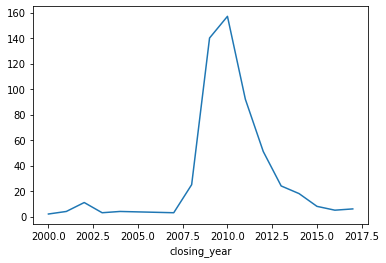

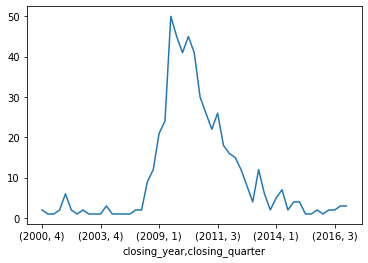

In [42]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = closing_year.plot()
plt.show()

fig, ax = plt.subplots()
ax = closing_year_q.plot()
plt.show()

###**시간 범위 수정하고 데이터 밀어내기 - shift 메서드**
- 나라별로 에볼라의 확산 속도를 비교하려면 발생하기 시작한 날짜를 옮기는 것이 좋음 - 그래프 그려서 알아보기

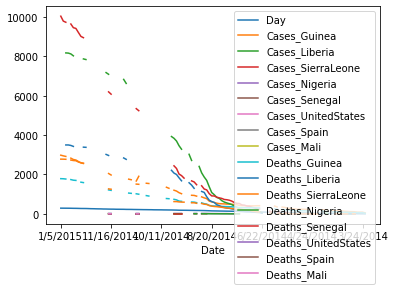

In [46]:
#에볼라의 확산 속도 비교하기
import matplotlib.pyplot as plt
ebola = pd.read_csv('country_timeseries.csv')

ebola.index = ebola['Date']
fig,ax = plt.subplots()
ax = ebola.iloc[0:, 1:].plot(ax=ax)  # ax 옵션을 ax로 설정
#ax.legend(fontsize=7, loc=2, borderaxespad=0.)  #loc 은 legend의 대략적 위치 설정, borderaxespad는 legend 경계와 축 사이의 pad를 입력받고 폰트 사이즈 유닛으로 측정됨, float로 입력받음
plt.show()

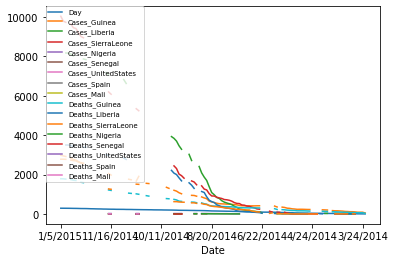

In [47]:
ebola.index = ebola['Date']
fig,ax = plt.subplots()
ax = ebola.iloc[0:, 1:].plot(ax=ax)  # ax 옵션을 ax로 설정
ax.legend(fontsize=7, loc=2, borderaxespad=0.)  #loc 은 legend의 대략적 위치 설정, borderaxespad는 legend 경계와 축 사이의 pad를 입력받고 폰트 사이즈 유닛으로 측정됨, float로 입력받음
plt.show()

- 각 나라의 에볼라 발병일이 달라 그래프가 그려지기 시작한 지점도 다름
- 각 나라의 발병일을 가장 처음 에볼라가 발병하 Guinea와 동일한 위치로 옮겨야 나라별 에볼라의 확산 속도를 제대로 비교할 수 있음

In [48]:
ebola_sub = ebola[['Day','Cases_Guinea', 'Cases_Liberia']]
print(ebola_sub.tail(10))
#예를 들어 Liberia는 4만큼 옮겨야 함

           Day  Cases_Guinea  Cases_Liberia
Date                                       
4/4/2014    13         143.0           18.0
4/1/2014    10         127.0            8.0
3/31/2014    9         122.0            8.0
3/29/2014    7         112.0            7.0
3/28/2014    6         112.0            3.0
3/27/2014    5         103.0            8.0
3/26/2014    4          86.0            NaN
3/25/2014    3          86.0            NaN
3/24/2014    2          86.0            NaN
3/22/2014    0          49.0            NaN


In [50]:
ebola = pd.read_csv('country_timeseries.csv', parse_dates=['Date'])
print(ebola.head().iloc[:,:5])
print(ebola.tail().iloc[:,:5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0
          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


In [51]:
#Date 열을 인덱스로 지정한 다음 ebola 데이터 프레임의 Date열의 최댓값과 최솟값으로 시간 범위를 생성하여 new_idx에 저장
#날짜가 아예 없었던 데이터의 인덱스를 생성할 수 있음
ebola.index = ebola.Date
new_idx = pd.date_range(ebola.index.min(), ebola.index.max())

In [52]:
#new_idx를 보면 ebola 데이터 집합에 있는 시간 순서와 반대로 생성되어 있음
print(new_idx)

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


In [53]:
new_idx = reversed(new_idx)
#순서 바꿔줌

In [54]:
#reindex를 사용하여 새로 생성한 인덱스를 새로운 인덱스로 지정, 아예 없었던 날짜가 추가됨
ebola = ebola.reindex(new_idx)
print(ebola.head().iloc[:,:5])
print(ebola.tail().iloc[:,:5])

                 Date    Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                        
2015-01-05 2015-01-05  289.0        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288.0        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287.0        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286.0           NaN         8157.0                NaN
2015-01-01        NaT    NaN           NaN            NaN                NaN


In [56]:
#각 나라의 에볼라 발병일 옮기기
#last_valid_index : 가장 오래된 데이터를 가져옴 , first_valid_index : 가장 최근 데이터 가져옴
last_valid = ebola.apply(pd.Series.last_valid_index)
print(last_valid)
first_valid = ebola.apply(pd.Series.first_valid_index)
print(first_valid)

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]
Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia       

In [57]:
#각 나라의 에볼라 발병일을 동일한 출발선으로 옮기려면 에볼라가 가장 처음 발병한 날에서 각 나라의 에볼라 발병일을 뺀만큼만 옮기면됨
earliest_date = ebola.index.min()
print(earliest_date)

shift_values = last_valid - earliest_date
print(shift_values)

2014-03-22 00:00:00
Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


In [58]:
#shift 메서드 사용하여 옮김 - 인자값만큼 데이터를 밀어냄
ebola_dict = {}
for idx, col in enumerate(ebola):
  d = shift_values[idx].days
  shifted = ebola[col].shift(d)
  ebola_dict[col] = shifted

#ebola_dict 는 시간을 다시 설정한 데이터가 딕셔너리 형태로 저장됨
ebola_shift = pd.DataFrame(ebola_dict)
print(ebola_shift.tail())

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Date                                                                         
2014-03-26 2014-03-26  4.0          86.0            8.0                2.0   
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN   
2014-03-24 2014-03-24  2.0          86.0            7.0                NaN   
2014-03-23        NaT  NaN           NaN            3.0                2.0   
2014-03-22 2014-03-22  0.0          49.0            8.0                6.0   

            Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
Date                                                                        
2014-03-26            1.0            NaN                 1.0          1.0   
2014-03-25            NaN            NaN                 NaN          NaN   
2014-03-24            NaN            NaN                 NaN          NaN   
2014-03-23            NaN            NaN                 NaN        

In [60]:
#인덱스를 Day열로 지정하고 그래프에 필요없는 Date, Day 열은 삭제하면 그래프 그리기 위한 DF 완성
ebola_shift.index = ebola_shift.Day
ebola_shift.drop(['Date','Day'], axis=1, inplace=True)
print(ebola_shift.tail())

     Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
Day                                                                  
4.0          86.0            8.0                2.0            1.0   
3.0          86.0            NaN                NaN            NaN   
2.0          86.0            7.0                NaN            NaN   
NaN           NaN            3.0                2.0            NaN   
0.0          49.0            8.0                6.0            0.0   

     Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
Day                                                               
4.0            NaN                 1.0          1.0         NaN   
3.0            NaN                 NaN          NaN         NaN   
2.0            NaN                 NaN          NaN         NaN   
NaN            NaN                 NaN          NaN         NaN   
0.0            1.0                 1.0          1.0         1.0   

     Deaths_Guinea  Deaths_Liberia  Dea

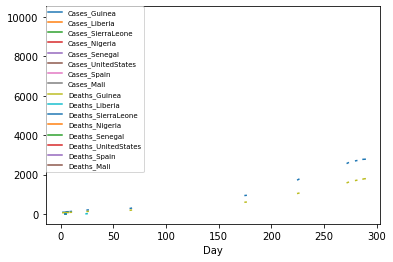

In [61]:
fig, ax = plt.subplots()
ax = ebola_shift.iloc[:,:].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()